[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/example_notebooks/autoregression_yosemite_temps.ipynb)

# DeepAR

This is a DeepAR model module usage example. We implemented this model under the same API as NeuralProphet, for easy comparison of the results of NeuralProphet and SOTA models.

We used as the base the implementation of DeepAR from Pytorch Forecasting library. The model parameters are inherited automatically from the dataset structure, if from_dataset is set to True.

For more detail on hyperparameters, please follow https://github.com/jdb78/pytorch-forecasting/blob/master/pytorch_forecasting/models/nbeats/__init__.py

In [ ]:
# install NeuralProphet from our repository
!pip install git+https://github.com/adasegroup/neural_prophet.git # may take a while

In [9]:
from neuralprophet.forecaster_additional_models import DeepAR
import pandas as pd

In [10]:
if 'google.colab' in str(get_ipython()):
    data_location = "https://raw.githubusercontent.com/adasegroup/neural_prophet/master/"
else:
    data_location = "../"

df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
df.head(3)
freq = '5min'

df = df.iloc[:1000]

In [11]:
deepar = DeepAR(
        context_length=60,
        prediction_length=10,
        batch_size = 32,
        epochs = 10,
        num_gpus = 0,
        patience_early_stopping = 10,
        early_stop = True,
        learning_rate=5e-4,
        auto_lr_find=True,
        num_workers=8,
        loss_func = 'normaldistributionloss',
        hidden_size=10,
        rnn_layers=2,
        dropout=0.1,
)

In [4]:
deepar.fit(df, freq = freq)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\neural_prophet\lib\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name                   | Type                   | Params
------------------------------------------------------------------
0 | loss                   | NormalDistributionLoss | 0     
1 | logging_metrics        | ModuleList             | 0     
2 | embeddings             | MultiEmbedding         | 0     
3 | rnn                    | LSTM                   | 1.4 K 
4 | distribution_projector | Linear                 | 22    
------------------------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.006     Total estimated model params size (MB)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restored states from the checkpoint file at D:\Workspace\NeuralProphet\v9\neural_prophet\example_notebooks\lr_find_temp_model.ckpt

  | Name                   | Type                   | Params
------------------------------------------------------------------
0 | loss                   | NormalDistributionLoss | 0     
1 | logging_metrics        | ModuleList             | 0     
2 | embeddings             | MultiEmbedding         | 0     
3 | rnn                    | LSTM                   | 1.4 K 
4 | distribution_projector | Linear                 | 22    
------------------------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.006     Total estimated model params size (MB)


Training: 11it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]


  | Name                   | Type                   | Params
------------------------------------------------------------------
0 | loss                   | NormalDistributionLoss | 0     
1 | logging_metrics        | ModuleList             | 0     
2 | embeddings             | MultiEmbedding         | 0     
3 | rnn                    | LSTM                   | 1.4 K 
4 | distribution_projector | Linear                 | 22    
------------------------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.006     Total estimated model params size (MB)


Training: 21it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

,SmoothL1Loss,MAE,MSE,SmoothL1Loss_val,MAE_val,MSE_val
0,6.451497,6.932894,74.768990,5.496339,5.993765,56.294903
1,2.431179,2.890208,14.403155,3.938126,4.437726,25.167539
2,1.896921,2.355370,9.635892,1.466443,1.911643,6.842530
3,0.949845,1.356440,3.238437,0.601203,1.058378,1.420183
4,0.729893,1.109557,2.620018,1.509117,1.985389,5.450509
5,0.843885,1.282603,2.379847,0.707452,1.110269,2.430943
6,0.586462,0.989447,1.523549,1.370575,1.848689,4.163982
7,1.013299,1.441856,3.431020,1.392853,1.842882,6.832202
8,0.918839,1.340330,2.734785,0.717464,1.153432,2.260212
9,0.508737,0.879751,1.426112,0.506264,0.742488,1.694474


In [5]:
future = deepar.make_future_dataframe(df, freq, periods=10, n_historic_predictions=10)

In [6]:
forecast = deepar.predict(future)

In [7]:
forecast.iloc[-15:]

,ds,y,yhat1,residual1
65,2017-05-04 10:55:00,8.3,8.52935,0.229347
66,2017-05-04 11:00:00,8.2,8.41934,0.219344
67,2017-05-04 11:05:00,8.2,8.42969,0.229689
68,2017-05-04 11:10:00,8.2,8.39904,0.199041
69,2017-05-04 11:15:00,8.1,8.3999,0.299898
70,2017-05-04 11:20:00,NaN,8.38088,NaN
71,2017-05-04 11:25:00,NaN,8.44119,NaN
72,2017-05-04 11:30:00,NaN,8.45293,NaN
73,2017-05-04 11:35:00,NaN,8.50029,NaN
74,2017-05-04 11:40:00,NaN,8.57737,NaN


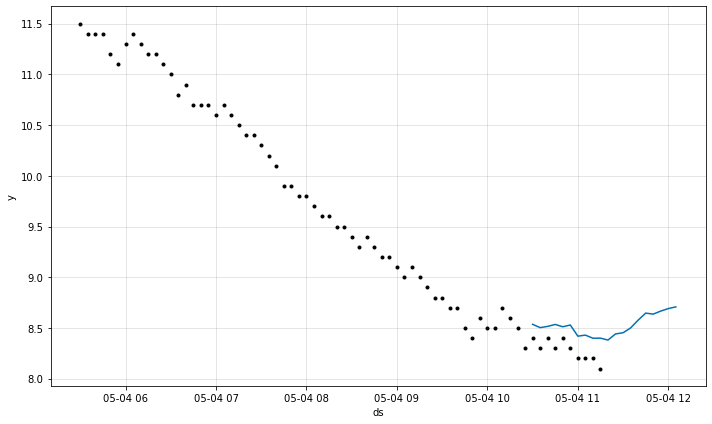

In [8]:
f = deepar.plot(forecast)